In [1]:
##Import the requred libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
# #Creating pandas df
import io
from google.colab import files
uploaded = files.upload()
df_R = pd.read_csv(io.BytesIO(uploaded['Rose.csv']))
#df_R = pd.read_csv('Rose.csv')

Saving Rose.csv to Rose.csv


In [ ]:
#from pandas.tseries.offsets import BDay # should be used to configure holidays and weekends according to the country of origin of the data

Series has to be read as a daily series with Mon-Friday as weekdays, hence frequency is defined as Bday().. Else if you define frequency as 365, it would assume that exchange was working for all 365 days


In [4]:
df_R.shape

(187, 2)

In [5]:
df_R.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [6]:
rcParams['figure.figsize'] = 15,8

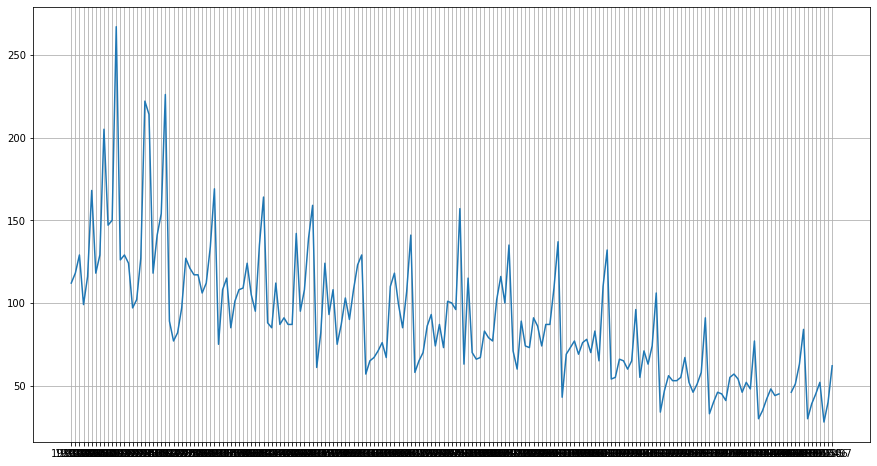

In [7]:
plt.plot(df_R['YearMonth'],df_R['Rose']);
plt.grid()

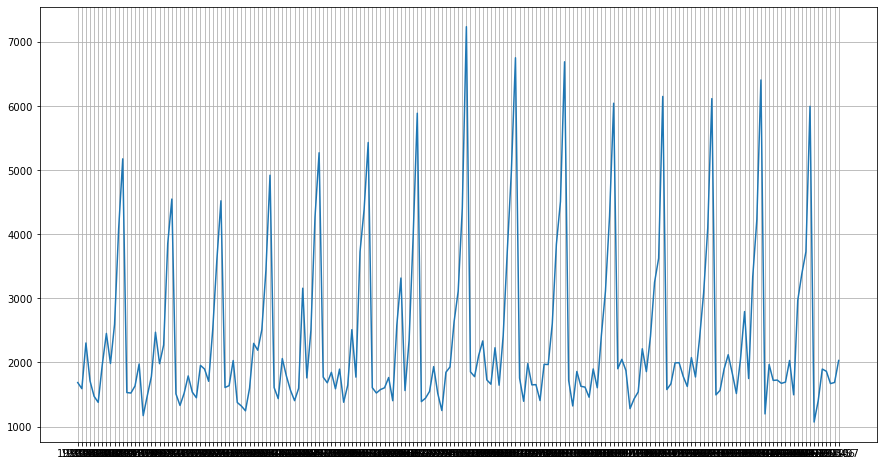

In [ ]:
plt.plot(df_S['YearMonth'],df_S['Sparkling']);
plt.grid()

In [8]:
df_date = pd.DataFrame(df_R)

In [9]:
df_date.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [10]:
df_date['YearMonth'] = pd.to_datetime(df_date['YearMonth'])

In [11]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Rose       185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [12]:
df_date['year'] = pd.DatetimeIndex(df_date['YearMonth']).year
df_date['month'] = pd.DatetimeIndex(df_date['YearMonth']).month

# Missing Values

In [13]:
df_date.isnull().sum()

YearMonth    0
Rose         2
year         0
month        0
dtype: int64

In [14]:
df_date.fillna(value =np.mean(df_date.Rose) , inplace = True)

# Plot the boxplot of the 'Rose wine' variable with respect to the different years.

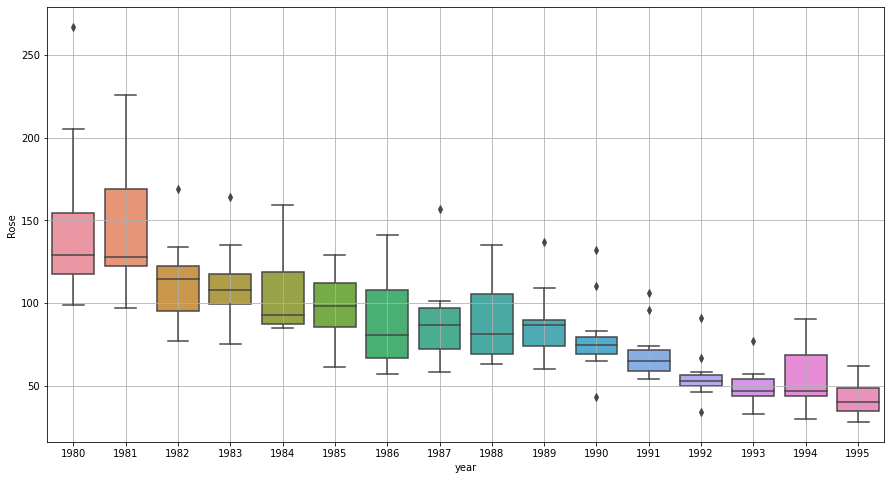

In [15]:
sns.boxplot(x =df_date['year'] ,y = df_date['Rose'])
plt.grid();

# Plot the boxplot of the 'Rose Wine' variable with respect to months of different.

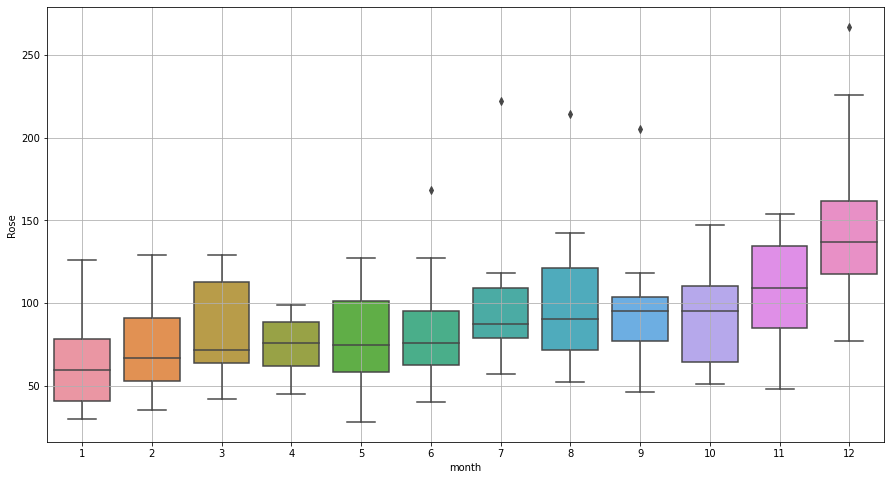

In [16]:
sns.boxplot(x =df_date['month'] ,y = df_date['Rose'])
plt.grid();

# Decompose the 'Volume' variable Time Series.

In [17]:
df_date.head()

YearMonth   Rose  year  month
0 1980-01-01  112.0  1980      1
1 1980-02-01  118.0  1980      2
2 1980-03-01  129.0  1980      3
3 1980-04-01   99.0  1980      4
4 1980-05-01  116.0  1980      5

In [18]:
df_date['Time_Stamp'] = pd.to_datetime(df_date['YearMonth'])
df_model = df_date.set_index('Time_Stamp')
df_model.drop(['year','month'], axis=1, inplace=True)
df_model.drop(['YearMonth'], axis=1, inplace=True)
df_model.tail()

Rose
Time_Stamp      
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

# Decompose Rose Wine

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



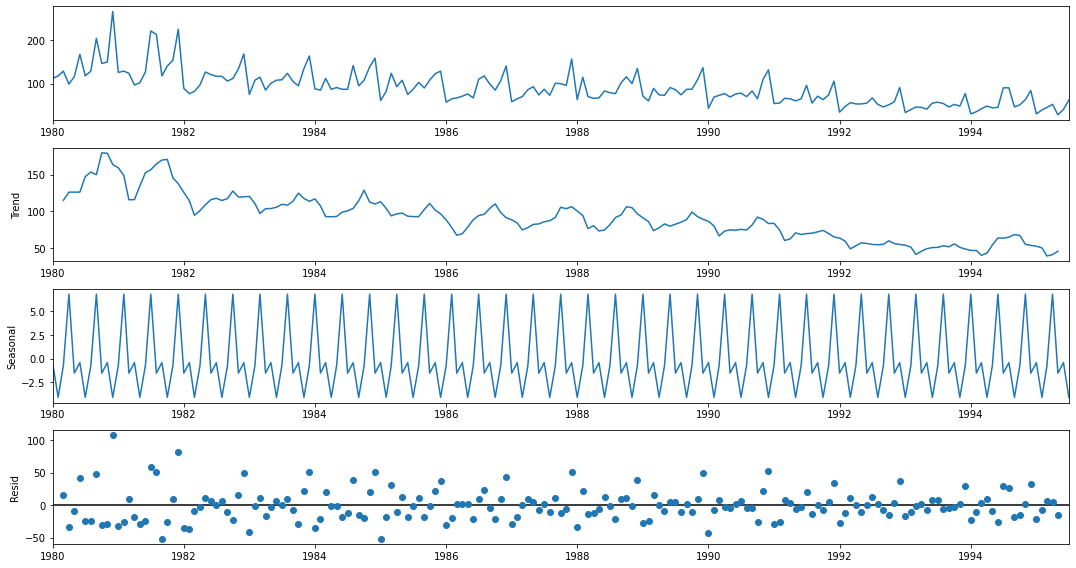

In [ ]:
decomposition = seasonal_decompose(df_model,model='additive', freq=5)
decomposition.plot();

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



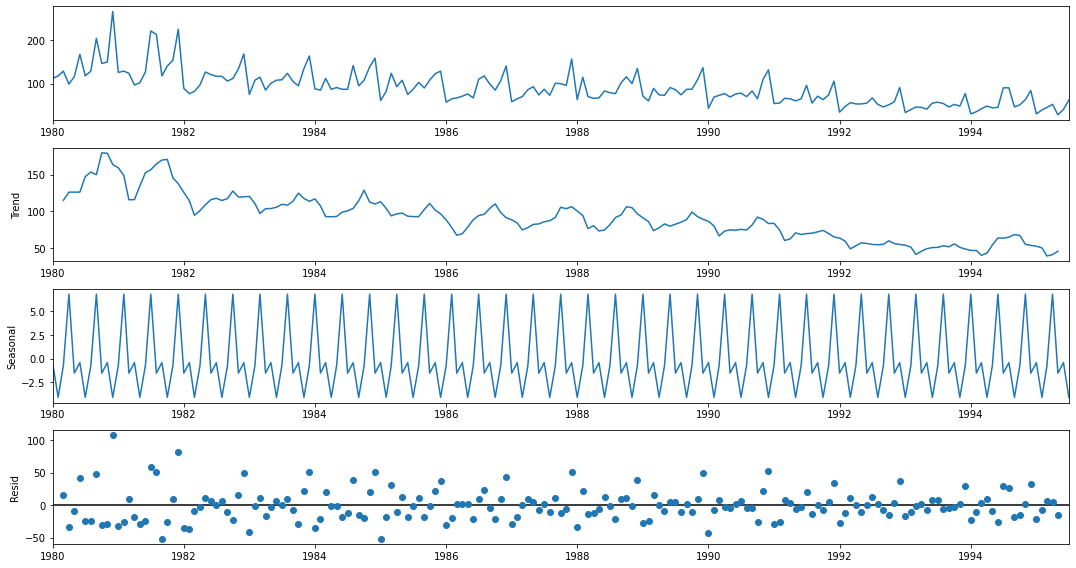

In [ ]:
decomposition = seasonal_decompose(df_model,model='additive', freq=5)
decomposition.plot();

 The additive model is useful when the seasonal variation is relatively constant over time -- So series is Additive --

# Decompose Rose Wine

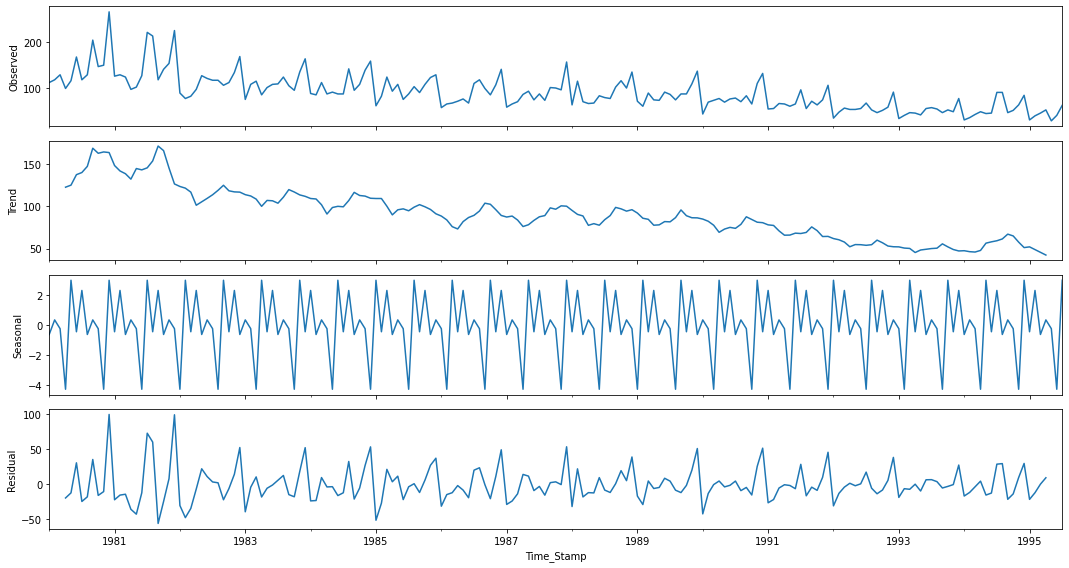

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_model,model='additive', freq=7)
decomposition.plot();

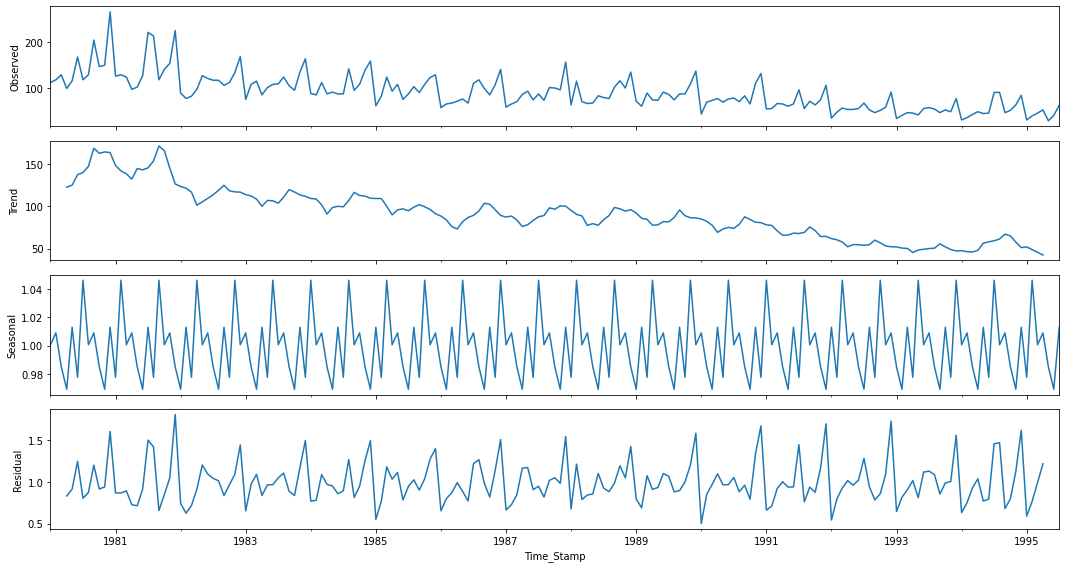

In [22]:
decomposition = seasonal_decompose(df_model,model='multiplicative', freq=7)
decomposition.plot();

 The additive model is useful when the seasonal variation is relatively constant over time -- So series is Additive --

# split into train n test -ROSE

In [23]:
df_model.head()

Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [24]:
train= df_model[pd.to_datetime(df_model.index) < pd.to_datetime('1991-01-01')]
train.shape

(132, 1)

In [25]:
test= df_model[pd.to_datetime(df_model.index) >= pd.to_datetime('1991-01-01')]
test.shape

(55, 1)

In [26]:
train_final = train[['Rose']]
test_final = test[['Rose']]


In [27]:
print(train_final.shape)
print(test_final.shape)

(132, 1)
(55, 1)


In [28]:
train_final.head()

Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

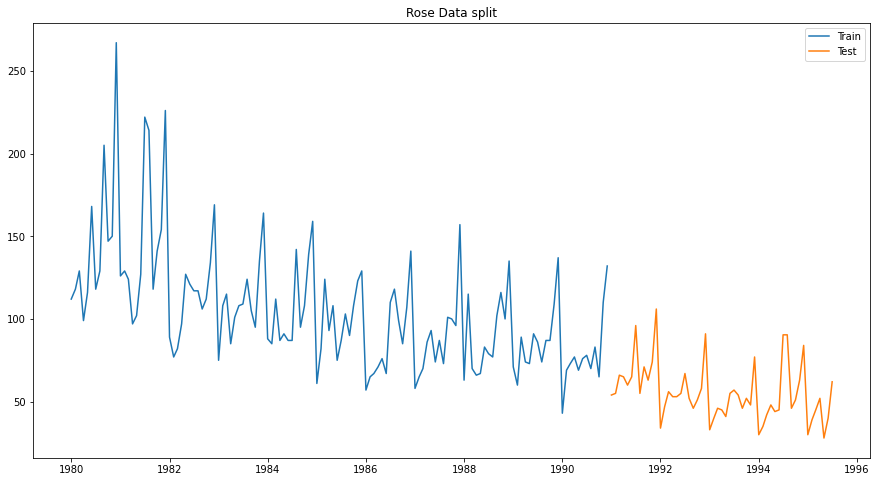

In [29]:

plt.plot(train_final.index, train_final, label = 'Train')
plt.plot(test_final.index, test_final,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Rose Data split')
plt.show()

# exponential smoothing - Rose

In [30]:
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error

In [31]:
pred = ets.ExponentialSmoothing(train_final, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(pred.params['smoothing_level'], 4))
print('Initial Level', np.round(pred.params['initial_level'], 4))
print('')
y_pred = pred.forecast(steps = 55)
#y_pred1 = pd.DataFrame(test_final)
y_pred


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.0988
Initial Level 134.3871



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



1991-01-01    87.105003
1991-02-01    87.105003
1991-03-01    87.105003
1991-04-01    87.105003
1991-05-01    87.105003
1991-06-01    87.105003
1991-07-01    87.105003
1991-08-01    87.105003
1991-09-01    87.105003
1991-10-01    87.105003
1991-11-01    87.105003
1991-12-01    87.105003
1992-01-01    87.105003
1992-02-01    87.105003
1992-03-01    87.105003
1992-04-01    87.105003
1992-05-01    87.105003
1992-06-01    87.105003
1992-07-01    87.105003
1992-08-01    87.105003
1992-09-01    87.105003
1992-10-01    87.105003
1992-11-01    87.105003
1992-12-01    87.105003
1993-01-01    87.105003
1993-02-01    87.105003
1993-03-01    87.105003
1993-04-01    87.105003
1993-05-01    87.105003
1993-06-01    87.105003
1993-07-01    87.105003
1993-08-01    87.105003
1993-09-01    87.105003
1993-10-01    87.105003
1993-11-01    87.105003
1993-12-01    87.105003
1994-01-01    87.105003
1994-02-01    87.105003
1994-03-01    87.105003
1994-04-01    87.105003
1994-05-01    87.105003
1994-06-01    87

In [32]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_final,y_pred,squared=False)
print(rmse)

35.936215662825326


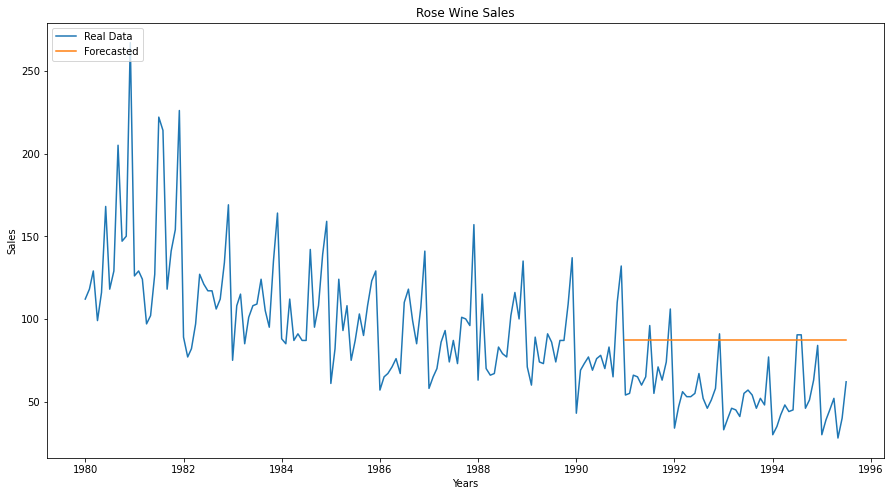

In [33]:
fig1, ax = plt.subplots()
ax.plot(df_model, label = 'Real Data')
ax.plot(y_pred, label = 'Forecasted')
plt.legend(loc = 'upper left')
plt.title('Rose Wine Sales')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.show()

# SimpleExpSmoothing - ROSE

In [37]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing


For alpha = 0.10,  RMSE is 35.9672


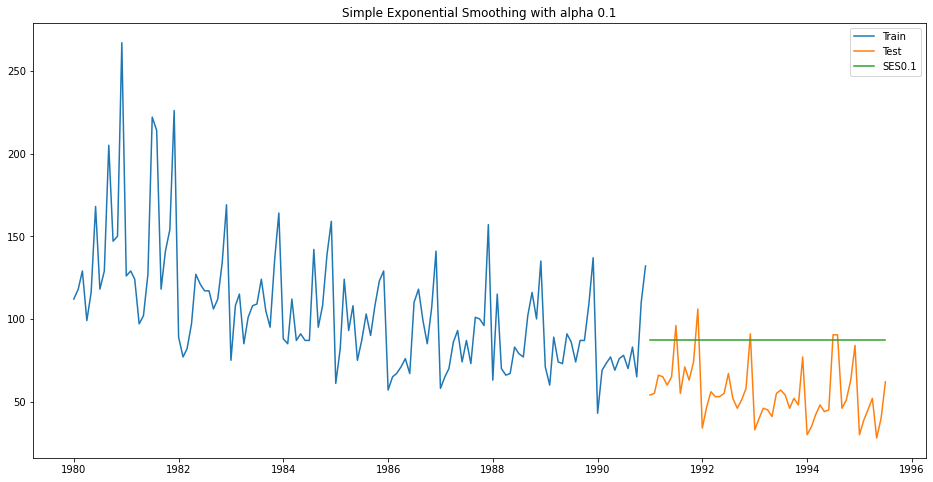

For alpha = 0.05,  RMSE is 36.1458


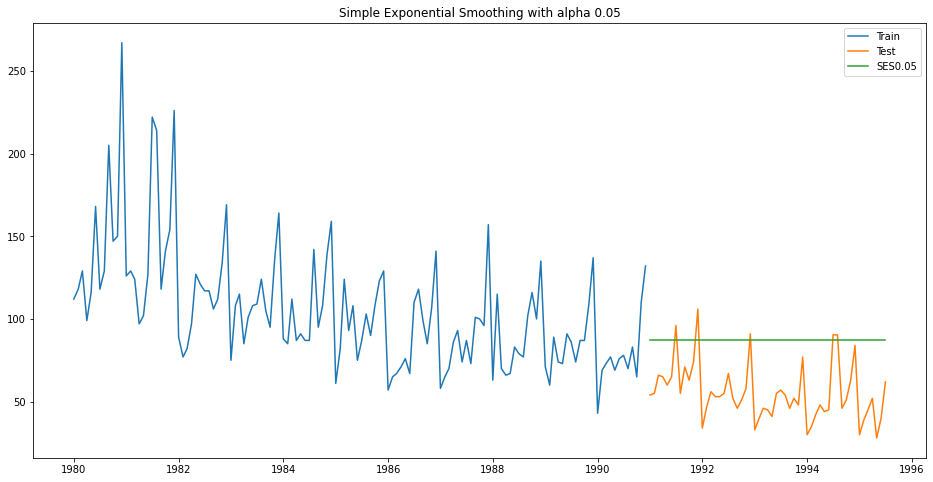

For alpha = 0.99,  RMSE is 78.1770


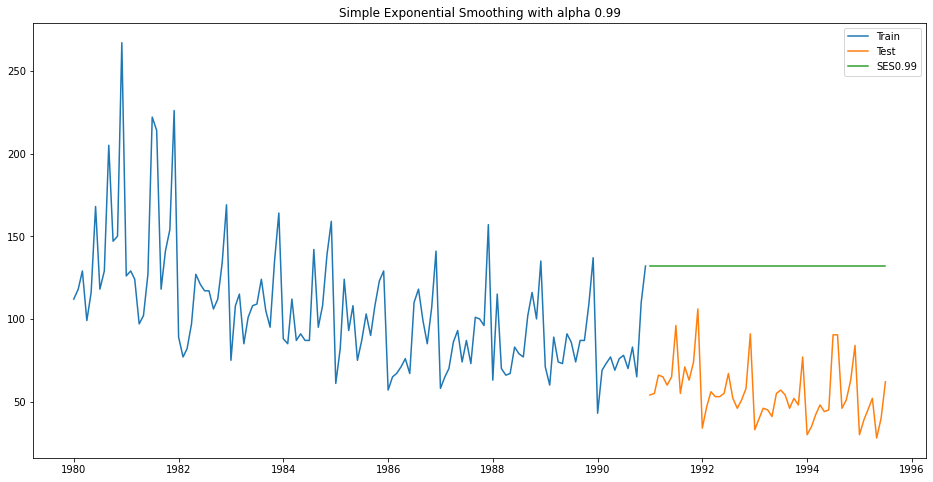

In [38]:
# fit model
model = SimpleExpSmoothing(np.asarray(train_final))
#defining the various values of alpha for which we want to run the model
alpha_list = [0.1, 0.05, 0.99] # 0.1 is best

pred_SES  = test_final.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test_final))#calculating the forecasts for the test set 
    #time period
    rmse                 =  np.sqrt(mean_squared_error(test_final, pred_SES[alpha_str]))#calculate the RMSE
    #for the test set
    #mape                 =  MAPE(test['Consumption'],pred_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("For alpha = %1.2f,  RMSE is %3.4f" %(alpha_value, rmse))
    plt.figure(figsize=(16,8))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train.index, train_final, label ='Train')
    plt.plot(test.index, test_final, label  ='Test')
    plt.plot(test.index, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

# Holt Winter - ROSE

In [39]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

In [40]:
model = Holt(np.asarray(train_final))

model_fit = model.fit()


print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fit.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))

Pred_Holt = test_final.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test_final))
rmse                 =  np.sqrt(mean_squared_error(test_final, Pred_Holt['Opt']))#calculate the RMSE
print('')
print('rmse = ',rmse)


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0

rmse =  68.97191721347805


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



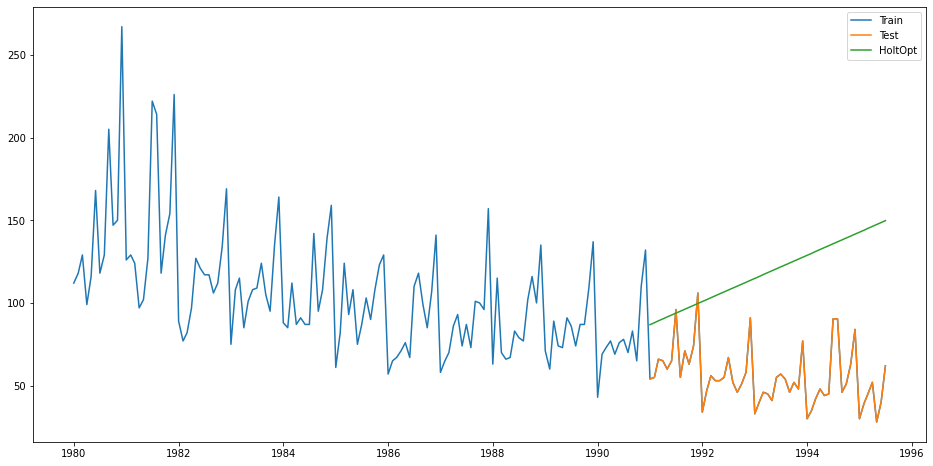

In [41]:
plt.figure(figsize=(16,8))
plt.plot(df_model, label='Train')
plt.plot(test_final, label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [42]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

# ExponentialSmoothing - Holt - Rose

In [43]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [44]:
pred1 = ExponentialSmoothing(np.asarray(train_final), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods =12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 55)
df_pred1 = pd.DataFrame(y_pred1)
print(y_pred1)
rmse                 =  np.sqrt(mean_squared_error(test_final, y_pred1))#calculate the RMSE
print('')
print('rmse = ',rmse)


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.1335
Smoothing Slope:  0.0138
Smoothing Seasonal:  0.0
Initial Level:  76.4026
Initial Slope:  0.0
Initial Seasons:  [ 38.6862  51.021   58.9926  48.329   57.12    62.5484  72.4337  78.5013
  74.4782  72.5458  90.6152 132.8676]

[ 44.13034379  56.06962636  63.6457374   52.58672664  60.98226808
  66.01516824  75.50496658  81.17712728  76.75853292  74.43066543
  92.10459674 133.96155567  39.38474772  51.32403028  58.90014132
  47.84113056  56.236672    61.26957216  70.7593705   76.43153121
  72.01293685  69.68506935  87.35900067 129.2159596   34.63915164
  46.57843421  54.15454525  43.09553449  51.49107593  56.52397609
  66.01377443  71.68593513  67.26734077  64.93947328  82.61340459
 124.47036352  29.89355557  41.83283813  49.40894917  38.34993841
  46.74547985  51.77838001  61.26817835  66.94033905  62.52174469
  60.1938772   77.86780852 119.72476745  25.14795949  37.08724206
  44.6633531   33.60434234  41.99988378

In [52]:
y_pred1 =  pred1.forecast(steps = 55)

In [58]:
test_final['pred'] = y_pred1
#test_final.shape

In [57]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


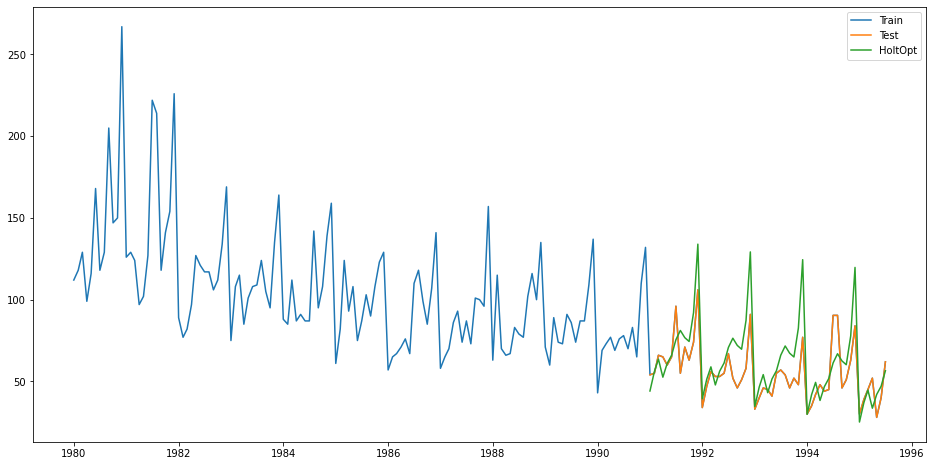

In [60]:
plt.figure(figsize=(16,8))
plt.plot(df_model, label='Train')
plt.plot(test_final['Rose'], label='Test')
plt.plot(test_final['pred'], label='HoltOpt')
plt.legend(loc='best')
plt.show()
test_final.drop('pred', axis = 1,inplace = True)

In [61]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

# Moving Avg -Rose

In [63]:
y_hat_avg = test_final.copy()
y_hat_avg['pred30'] = train_final['Rose'].rolling(30).mean().iloc[-1]
y_hat_avg['pred120'] = train_final['Rose'].rolling(120).mean().iloc[-1]
y_hat_avg['pred90'] = train_final['Rose'].rolling(90).mean().iloc[-1]
y_hat_avg['pred45'] = train_final['Rose'].rolling(45).mean().iloc[-1]

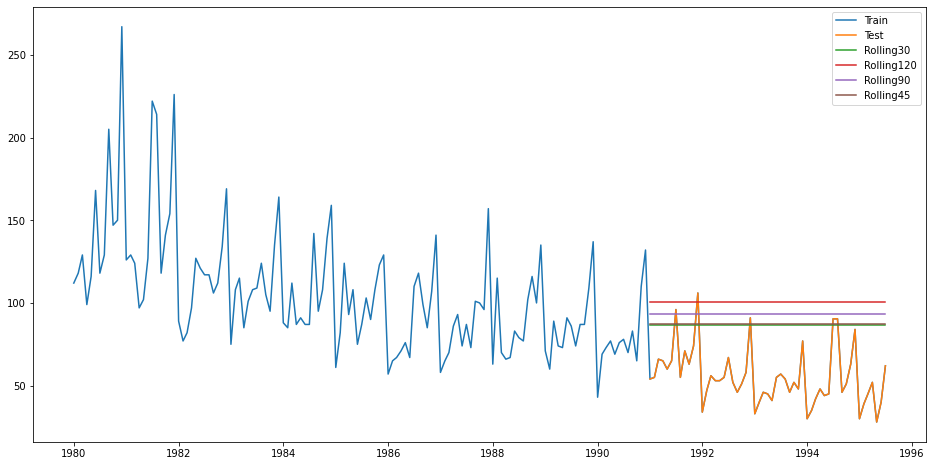

In [65]:
plt.figure(figsize=(16,8))
plt.plot(df_model, label='Train')
plt.plot(test_final['Rose'], label='Test')
plt.plot(y_hat_avg['pred30'], label='Rolling30')
plt.plot(y_hat_avg['pred120'], label='Rolling120')
plt.plot(y_hat_avg['pred90'], label='Rolling90')
plt.plot(y_hat_avg['pred45'], label='Rolling45')
plt.legend(loc='best')
plt.show()


# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [66]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

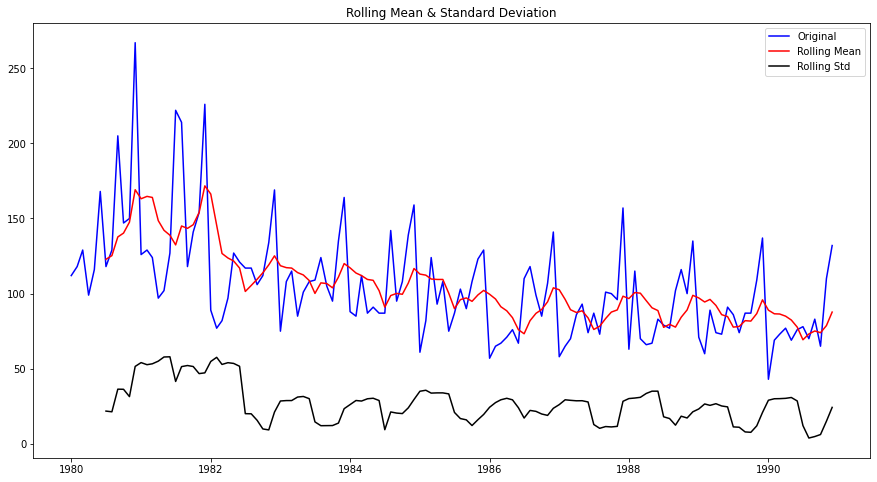

Results of Dickey-Fuller Test:


ValueError: ignored

In [67]:
test_stationarity(train_final)

In [69]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


In [71]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_final['Rose'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.4684057698005
ARIMA(0, 0, 2) - AIC:1306.5866794770805
ARIMA(1, 0, 0) - AIC:1301.5463044352935
ARIMA(1, 0, 1) - AIC:1294.5105851918095
ARIMA(1, 0, 2) - AIC:1292.0532102473421


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(2, 0, 0) - AIC:1302.3460741769766
ARIMA(2, 0, 1) - AIC:1292.9371945613093


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(2, 0, 2) - AIC:1292.248055332399


In [72]:
dfObj.sort_values(by=['AIC']).head()

NameError: ignored

In [ ]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_finalS['Sparkling'], order=(0,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Sun, 26 Jul 2020   AIC                           2232.783
Time:                        20:28:23   BIC                           2244.284
Sample:                    02-01-1980   HQIC                          2237.456
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2469      3.800      1.644      0.100      -1.201      13.695
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [74]:
#final_hat_avg =train_finalS_diif.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA[0]

array([93.93131383, 88.94834775, 91.59199046, 90.73946847, 91.48207111,
       91.48944353, 91.82832989, 92.01052332, 92.25956171, 92.4731959 ,
       92.69829778, 92.91348125, 93.12860286, 93.33921755, 93.54742552,
       93.75233009, 93.9544054 , 94.1534972 , 94.34973797, 94.54312804,
       94.73372736, 94.92156772, 95.10669294, 95.28914047, 95.46894988,
       95.64615893, 95.8208054 , 95.99292627, 96.16255809, 96.32973685,
       96.49449803, 96.65687658, 96.81690696, 96.97462313, 97.13005855,
       97.2832462 , 97.4342186 , 97.58300777, 97.72964529, 97.87416227,
       98.01658938, 98.15695684, 98.29529443, 98.43163151, 98.56599701,
       98.69841944, 98.8289269 , 98.95754707, 99.08430726, 99.20923436,
       99.33235488, 99.45369495, 99.5732803 , 99.69113632, 99.80728801])

In [75]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_ARIMA[0]))
print(rmse)

44.10728379722739


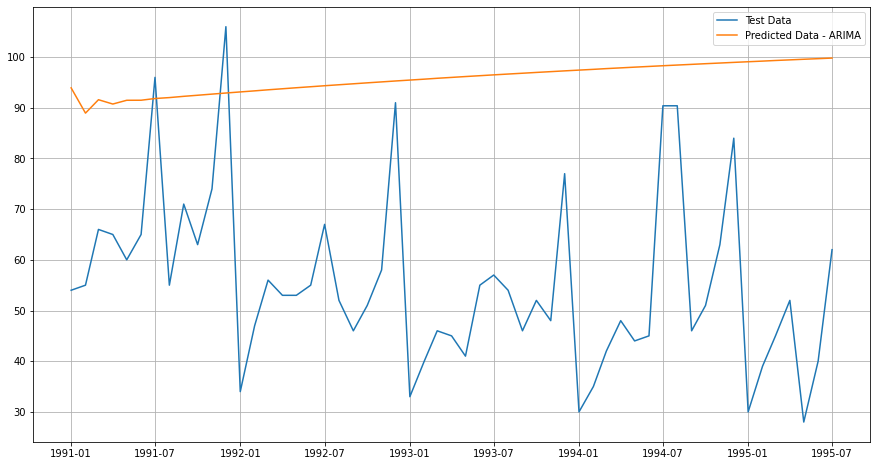

In [76]:
#plt.plot(train_finalS_log_diff,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model Rose - 1

In [77]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [78]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:1453.7019415527918
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:1346.8085541177309
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:1326.0913916364734
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:1239.60870697362


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1191.3074957441247
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1233.3792414384438


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1199.2423565474821


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1181.6187567529644
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:1481.8198652085207
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:1380.9872015494282


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:1275.1645332434591
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:1314.296337106591


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.6924331473285


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1180.3587715643594
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1227.7797497037773


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1198.0962607130884


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1162.1586538570216
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:1426.8445495316998
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:1330.3382412350552


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1250.312463949749
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1316.2937895987166


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1219.7386878617724


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1172.5165119291976


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1221.7265645520501


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1198.848001003301


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1155.1807949451825
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1331.248484434985
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1283.3695757467306
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1229.6024967780565


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1283.6697273696468
SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1237.4573193783322


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1190.3229112952843
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1222.1989846287447


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1189.3092772660614


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1180.1763772690538
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1268.426754552259


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.1873983255


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1174.8650485065875
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1229.6101351190073


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.095039186731


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1174.4897693515918


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1184.1032919656557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1175.7668559121496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1170.7300285492356
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.7656242377489
SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.5814637007184


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1141.2995962508721
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1231.3182979497365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1216.7350563843042


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1149.7349984779607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1181.7785025824835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1180.7267038180448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1150.9446729094861
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1308.2736030498359
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1270.463167046599
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1213.4537936116044
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1261.0339817854426


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1229.5499198314906


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1213.2448700481254
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1185.7937010503022


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1200.216837423723


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1163.730524507308
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1266.3761683246394


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.6286079486765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1176.4190716121884


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1220.6972463013476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1230.1098808621261


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1165.6156373172541
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1176.4966739583328


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1173.314021879528


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1175.4865320919175
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.6801765499558


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.9391622424696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1150.5028107740493


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1220.8227066168458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1217.5313198733616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1151.278890453029
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1186.468036494527


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1165.9811836944532
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1152.20845666179


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [79]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  1141.299596
50  (1, 0, 2)  (1, 0, 2, 5)  1149.734998
74  (2, 0, 2)  (0, 0, 2, 5)  1150.502811
53  (1, 0, 2)  (2, 0, 2, 5)  1150.944673
77  (2, 0, 2)  (1, 0, 2, 5)  1151.278890
..        ...           ...          ...
10  (0, 0, 1)  (0, 0, 1, 5)  1380.987202
18  (0, 0, 2)  (0, 0, 0, 5)  1426.844550
1   (0, 0, 0)  (0, 0, 1, 5)  1453.701942
9   (0, 0, 1)  (0, 0, 0, 5)  1481.819865
0   (0, 0, 0)  (0, 0, 0, 5)  1607.530754

[81 rows x 3 columns]

In [80]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.129
Date:                            Sun, 02 Aug 2020   AIC                            778.258
Time:                                    07:44:57   BIC                            800.955
Sample:                                01-01-1980   HQIC                           787.419
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8287      0.147     -5.629      0.000      -1.117      -0.540
ar.L2          0.0620      0.117   

In [81]:
#final_hat_avg =test_finalS.copy()
pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

1991-01-01     42.343773
1991-02-01     63.290735
1991-03-01     65.315995
1991-04-01     62.889281
1991-05-01     64.692418
1991-06-01     66.170685
1991-07-01     72.533325
1991-08-01     74.572014
1991-09-01     75.938228
1991-10-01     73.333407
1991-11-01     96.126395
1991-12-01    126.831306
1992-01-01     40.870944
1992-02-01     56.471422
1992-03-01     61.908615
1992-04-01     56.296910
1992-05-01     60.718273
1992-06-01     61.570157
1992-07-01     68.581046
1992-08-01     71.221966
1992-09-01     71.106627
1992-10-01     71.607235
1992-11-01     90.152209
1992-12-01    122.304451
1993-01-01     36.385025
1993-02-01     51.951770
1993-03-01     57.760447
1993-04-01     52.219519
1993-05-01     56.384364
1993-06-01     57.270468
1993-07-01     64.278053
1993-08-01     66.213144
1993-09-01     66.879284
1993-10-01     66.399190
1993-11-01     86.265800
1993-12-01    117.830835
1994-01-01     31.846527
1994-02-01     47.570970
1994-03-01     53.299197
1994-04-01     47.828218


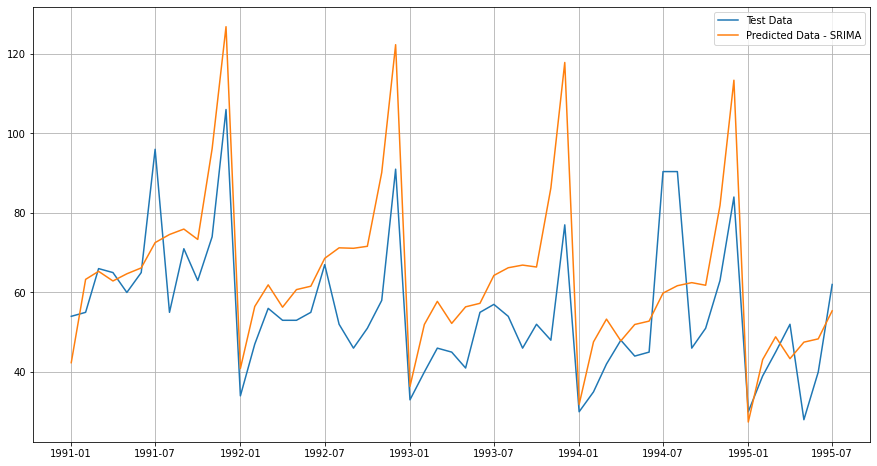

In [82]:
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [84]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_SARIMA.predicted_mean))
print(rmse)

16.457220812633768


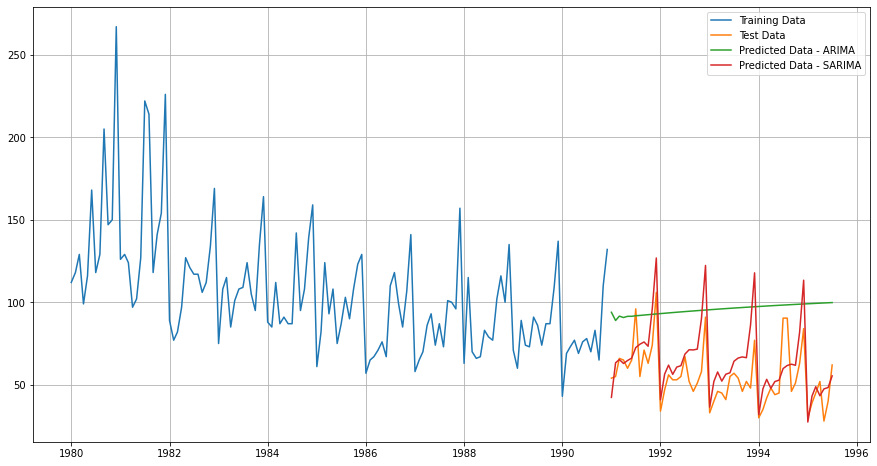

In [86]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_ARIMA[0]))
print(rmse)

17.280661715212744


In [87]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:1453.7019415527918
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:1346.8085541177309
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:1326.0913916364734
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:1239.60870697362


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1191.3074957441247
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1233.3792414384438


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1199.2423565474821


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1181.6187567529644
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:1481.8198652085207
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:1380.9872015494282


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:1275.1645332434591
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:1314.296337106591


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.6924331473285


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1180.3587715643594
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1227.7797497037773


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1198.0962607130884


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1162.1586538570216
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:1426.8445495316998
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:1330.3382412350552


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1250.312463949749
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1316.2937895987166


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1219.7386878617724


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1172.5165119291976


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1221.7265645520501


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1198.848001003301


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1155.1807949451825
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1331.248484434985
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1283.3695757467306
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1229.6024967780565
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1283.6697273696468


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1237.4573193783322


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1190.3229112952843
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1222.1989846287447


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1189.3092772660614


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1180.1763772690538
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1268.426754552259


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.1873983255


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1174.8650485065875
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1229.6101351190073


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.095039186731


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1174.4897693515918


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1184.1032919656557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1175.7668559121496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1170.7300285492356
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.7656242377489
SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.5814637007184


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1141.2995962508721
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1231.3182979497365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1216.7350563843042


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1149.7349984779607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1181.7785025824835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1180.7267038180448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1150.9446729094861
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1308.2736030498359
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1270.463167046599
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1213.4537936116044
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1261.0339817854426


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1229.5499198314906


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1213.2448700481254
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1185.7937010503022


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1200.216837423723


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1163.730524507308
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1266.3761683246394


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.6286079486765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1176.4190716121884


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1220.6972463013476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1230.1098808621261


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1165.6156373172541
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1176.4966739583328


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1173.314021879528


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1175.4865320919175
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.6801765499558


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.9391622424696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1150.5028107740493


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1220.8227066168458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1217.5313198733616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1151.278890453029
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1186.468036494527


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1165.9811836944532
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1152.20845666179


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [88]:
dfObj2.sort_values(by=['AIC']).head()

param      seasonal          AIC
128  (1, 0, 2)  (0, 0, 2, 5)  1141.299596
47   (1, 0, 2)  (0, 0, 2, 5)  1141.299596
131  (1, 0, 2)  (1, 0, 2, 5)  1149.734998
50   (1, 0, 2)  (1, 0, 2, 5)  1149.734998
155  (2, 0, 2)  (0, 0, 2, 5)  1150.502811

In [89]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                 Statespace Model Results                                
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 5)   Log Likelihood                -537.305
Date:                           Sun, 02 Aug 2020   AIC                           1092.611
Time:                                   07:47:35   BIC                           1117.157
Sample:                               01-01-1980   HQIC                          1102.571
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7310      0.105     -6.968      0.000      -0.937      -0.525
ar.L2          0.2549      0.104      2.459

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [90]:

pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

1991-01-01     99.881046
1991-02-01    103.429978
1991-03-01     79.695941
1991-04-01     75.051561
1991-05-01     77.928297
1991-06-01     76.981150
1991-07-01     75.453325
1991-08-01     75.565028
1991-09-01     75.165551
1991-10-01     70.481726
1991-11-01     76.343151
1991-12-01     88.472393
1992-01-01     72.397954
1992-02-01     73.087229
1992-03-01     71.460085
1992-04-01     74.672875
1992-05-01     75.497711
1992-06-01     72.032363
1992-07-01     69.597952
1992-08-01     68.390254
1992-09-01     70.953767
1992-10-01     81.245125
1992-11-01     67.523104
1992-12-01     69.331452
1993-01-01     65.615994
1993-02-01     70.807297
1993-03-01     72.926176
1993-04-01     67.850897
1993-05-01     64.834792
1993-06-01     64.824013
1993-07-01     66.258543
1993-08-01     75.612542
1993-09-01     63.025811
1993-10-01     65.084257
1993-11-01     60.728794
1993-12-01     66.518493
1994-01-01     69.342726
1994-02-01     63.438364
1994-03-01     60.375144
1994-04-01     60.658967


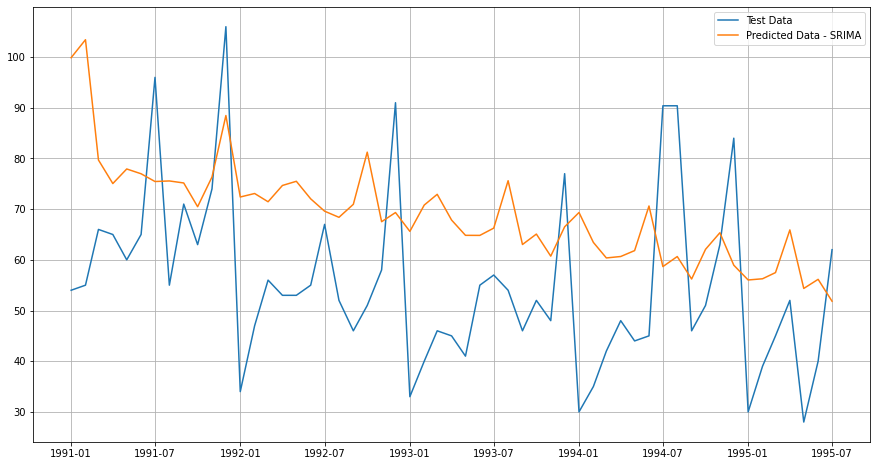

In [91]:
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [92]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_SARIMA.predicted_mean))
print(rmse)

22.009305761473126


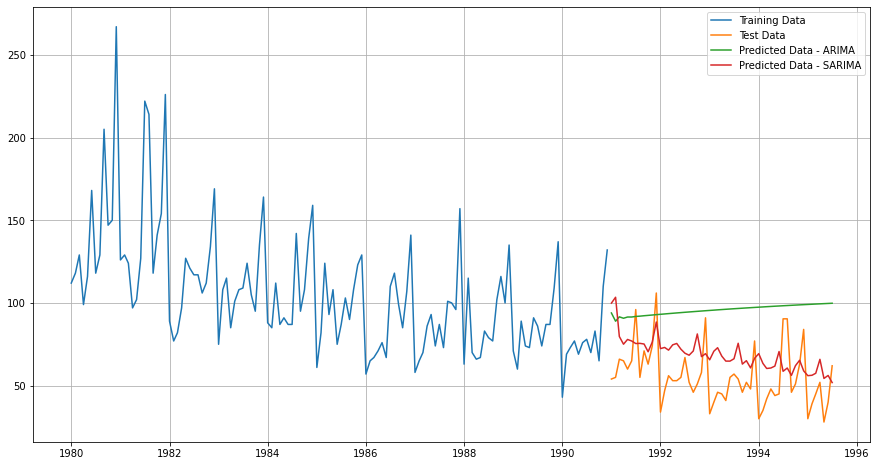

In [93]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

#  ACF and PACF - Rose

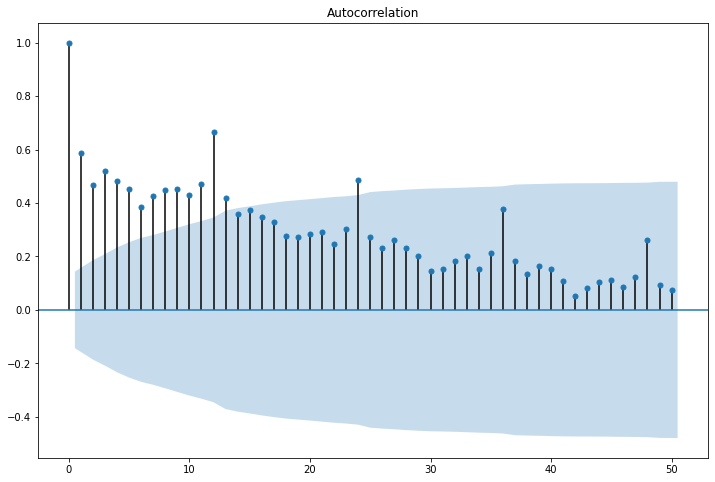

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8))
plot_acf(df_model['Rose'],lags=50,  ax=plt.gca())
plt.show()


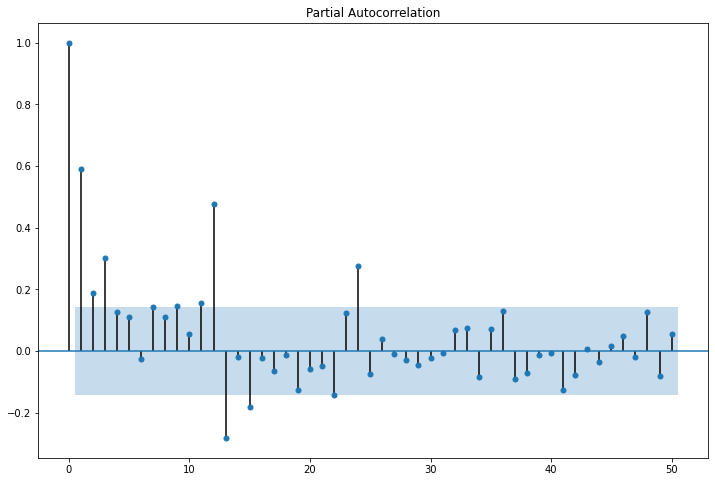

In [ ]:
plt.figure(figsize=(12,8))
plot_pacf(df_model['Rose'], lags=50, ax=plt.gca())
plt.show()

# Using LSTM for time series

In [172]:
train_final = train[['Rose']]
test_final = test[['Rose']]

In [175]:
test_final.isna().sum()

Rose    0
dtype: int64

In [111]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()

In [176]:
train_final['Rose'] = scale.fit_transform(train_final[['Rose']])
test_final['Rose'] = scale.fit_transform(test_final[['Rose']])

In [177]:
train_final['day'] = train_final.index.day
train_final['day_of_week'] = train_final.index.dayofweek
train_final['month'] = train_final.index.month
train_final['year'] = train_final.index.year

In [178]:
test_final['day'] = test_final.index.day
test_final['day_of_week'] = test_final.index.dayofweek
test_final['month'] = test_final.index.month
test_final['year'] = test_final.index.year

In [139]:
#train_final.reset_index(drop=True, inplace=True) # Time_Stamp
#test_final.reset_index(drop=True, inplace=True)

In [157]:
def create_dataset(x, y, time_step = 5):
  xs,ys = [] , []
  for i in range(len(x) - time_step):
    v = x.iloc[i:(i + time_step)].values
    xs.append(v)
    ys.append(y.iloc[i + time_step])
  return np.array(xs), np.array(ys)

In [179]:
x_train, y_train = create_dataset(train_final, train_final.Rose, 5)

In [180]:
y_train.shape

(127,)

In [181]:
x_test, y_test = create_dataset(test_final, test_final['Rose'], time_step = 5)

In [123]:
import keras
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Activation, Flatten, Dense

In [182]:
lstm = Sequential()

In [183]:
lstm.add(Bidirectional(LSTM(units = 127, input_shape = (x_train.shape[1], x_train.shape[2]))))
lstm.add(Dropout(rate= 0.2))
lstm.add(Dense(units = 1))
lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [185]:
lstm.fit(x_train, y_train, epochs = 50, batch_size= 5, validation_split = 0.1 , shuffle= False)

Train on 114 samples, validate on 13 samples
Epoch 1/50
114/114 [==============================] - 1s 7ms/step - loss: 0.8428 - val_loss: 0.6140
Epoch 2/50
114/114 [==============================] - 1s 7ms/step - loss: 0.7140 - val_loss: 0.5470
Epoch 3/50
114/114 [==============================] - 1s 7ms/step - loss: 0.7705 - val_loss: 0.5727
Epoch 4/50
114/114 [==============================] - 1s 7ms/step - loss: 0.8560 - val_loss: 0.5420
Epoch 5/50
114/114 [==============================] - 1s 7ms/step - loss: 0.7959 - val_loss: 0.5441
Epoch 6/50
114/114 [==============================] - 1s 8ms/step - loss: 0.8635 - val_loss: 0.5577
Epoch 7/50
114/114 [==============================] - 1s 7ms/step - loss: 0.7885 - val_loss: 0.5519
Epoch 8/50
114/114 [==============================] - 1s 7ms/step - loss: 0.8132 - val_loss: 0.5713
Epoch 9/50
114/114 [==============================] - 1s 7ms/step - loss: 0.7972 - val_loss: 0.5786
Epoch 10/50
114/114 [==============================] - 

In [186]:
pred = lstm.predict(x_test)

In [196]:
y_train_inv = scale.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scale.inverse_transform(y_test.reshape(1, -1))
pred_inv = scale.inverse_transform(pred.reshape(1,-1))

In [197]:
rmse = mean_squared_error(y_test_inv,pred_inv,squared=False)
print(rmse)

17.78316816271984
